### AKI的比例，多少恢复了
### AKI的诊断率
### AKI诊断率与

In [1]:
library(tidyverse)
library(stringr)
library(tableone)
library(readxl)

Warning message:
"package 'tidyverse' was built under R version 3.2.5"Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'ggplot2' was built under R version 3.2.5"Warning message:
"package 'tibble' was built under R version 3.2.5"Warning message:
"package 'tidyr' was built under R version 3.2.5"Warning message:
"package 'readr' was built under R version 3.2.5"Warning message:
"package 'purrr' was built under R version 3.2.5"Warning message:
"package 'dplyr' was built under R version 3.2.5"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message:
"package 'stringr' was built under R version 3.2.5"Warning message:
"package 'tableone' was built under R version 3.2.5"Warning message:
"package 'readxl' was built under R version 3.2.5"

In [2]:
options(scipen = 50)

In [3]:
#read data from csv
df <- read.csv('D:/p/aha/in_patient_xn.csv',fileEncoding = "UTF-8-BOM")

In [4]:
#glimpse(df)

In [5]:
# replace age into number
df$PATIENT_AGE <- as.numeric(str_replace(df$PATIENT_AGE, '\\D', ''))

In [6]:
cols <- c("IN_PATIENT_FLOW", "MR_ID")
df[cols] <- lapply(df[cols], as.character)
summary(df)

 IN_PATIENT_FLOW       MR_ID           IN_HOS_DATETIME         
 Length:23684       Length:23684       Min.   :20090416125900  
 Class :character   Class :character   1st Qu.:20130325091100  
 Mode  :character   Mode  :character   Median :20140924139500  
                                       Mean   :20141885016900  
                                       3rd Qu.:20160127101000  
                                       Max.   :20170606153800  
                                                               
 OUT_HOS_DATETIME         PATIENT_SEX  PATIENT_AGE    
 Min.   :20110603095500   男:13771    Min.   :  0.00  
 1st Qu.:20130329103700   女: 9913    1st Qu.: 56.00  
 Median :20140929082100               Median : 64.00  
 Mean   :20141936403700               Mean   : 64.03  
 3rd Qu.:20160129082000               3rd Qu.: 75.00  
 Max.   :20170606104900               Max.   :104.00  
 NA's   :231                                          

In [7]:
lis_sample_in <- read_csv("D:/p/aha/lis_sample_in.csv")

Parsed with column specification:
cols(
  INSPECTION_ID = col_character(),
  OUTPATIENT_ID = col_integer(),
  INPATIENT_ID = col_character(),
  PATIENT_SEX = col_integer(),
  AGE_INPUT = col_character(),
  SAMPLE_CLASS_NAME = col_character(),
  TEST_ORDER_NAME = col_character(),
  SAMPLING_TIME = col_character(),
  CHECK_TIME = col_character(),
  INSERT_TIME = col_character(),
  PATIENT_ID = col_character()
)
Warning message:
"207 parsing failures.
 row           col   expected     actual
6878 OUTPATIENT_ID an integer Z207130402
6997 OUTPATIENT_ID an integer Z207130402
6998 OUTPATIENT_ID an integer Z207130402
7618 OUTPATIENT_ID an integer Z207130402
7623 OUTPATIENT_ID an integer Z207130402
.... ............. .......... ..........
See problems(...) for more details.
"

In [8]:
lis_sample_in <- select(lis_sample_in, 1:3,11)

In [9]:
summary(lis_sample_in)

 INSPECTION_ID      OUTPATIENT_ID       INPATIENT_ID        PATIENT_ID       
 Length:333066      Min.   :      990   Length:333066      Length:333066     
 Class :character   1st Qu.:  2213176   Class :character   Class :character  
 Mode  :character   Median :  2271659   Mode  :character   Mode  :character  
                    Mean   :  2780680                                        
                    3rd Qu.:  2319296                                        
                    Max.   :932766013                                        
                    NA's   :215                                              

In [10]:
lis_result_in <- read_csv("D:/p/aha/lis_result_in.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  INSPECTION_ID = col_character(),
  ENGLISH_NAME = col_character(),
  QUANTITATIVE_RESULT = col_character()
)


In [11]:
summary(lis_result_in)

       X1          INSPECTION_ID      ENGLISH_NAME       QUANTITATIVE_RESULT
 Min.   :      1   Length:4535396     Length:4535396     Length:4535396     
 1st Qu.:1133850   Class :character   Class :character   Class :character   
 Median :2267698   Mode  :character   Mode  :character   Mode  :character   
 Mean   :2267698                                                            
 3rd Qu.:3401547                                                            
 Max.   :4535396                                                            

In [12]:
lis_scr_in <- filter(lis_result_in, ENGLISH_NAME=="CREA*")

In [13]:
summary(lis_scr_in)

       X1          INSPECTION_ID      ENGLISH_NAME       QUANTITATIVE_RESULT
 Min.   :     30   Length:67980       Length:67980       Length:67980       
 1st Qu.:1056858   Class :character   Class :character   Class :character   
 Median :2111362   Mode  :character   Mode  :character   Mode  :character   
 Mean   :2184621                                                            
 3rd Qu.:3309295                                                            
 Max.   :4535349                                                            

In [14]:
lis_scr_in <- left_join(lis_scr_in, lis_sample_in, by="INSPECTION_ID")

In [15]:
cols <- c("QUANTITATIVE_RESULT")
lis_scr_in[cols] <- lapply(lis_scr_in[cols], function(x) iconv(x,"gb2312","UTF-8"))

In [16]:
cols <- c("ENGLISH_NAME")
lis_scr_in[cols] <- lapply(lis_scr_in[cols], as.factor)

In [17]:
lis_scr_in$QUANTITATIVE_RESULT <- as.numeric(as.character(lis_scr_in$QUANTITATIVE_RESULT))

Warning message in eval(expr, envir, enclos):
"强制改变过程中产生了NA"

In [18]:
lis_scr_in <- left_join(lis_scr_in, df, by=c("INPATIENT_ID"="IN_PATIENT_FLOW"))

In [19]:
#glimpse(lis_scr_in)

In [20]:
fn<-
lis_scr_in %>%
  group_by(INPATIENT_ID) %>%
  summarise(
      n=n(), 
      baseline=QUANTITATIVE_RESULT[INSPECTION_ID==min(INSPECTION_ID)], 
      peak=max(QUANTITATIVE_RESULT), 
      last=QUANTITATIVE_RESULT[INSPECTION_ID==max(INSPECTION_ID)],
      akiday=as.numeric(as.Date(substr(min(INSPECTION_ID[QUANTITATIVE_RESULT==max(QUANTITATIVE_RESULT)]),0,8),"%Y%m%d")-as.Date(substr(min(INSPECTION_ID),0,8),"%Y%m%d"))
  ) %>%
  left_join(df, by=c("INPATIENT_ID"="IN_PATIENT_FLOW")) %>%
  filter(!is.na(OUT_HOS_DATETIME) & !is.na(IN_HOS_DATETIME)) %>%
  mutate(stay=as.numeric(as.Date(as.character(OUT_HOS_DATETIME),"%Y%m%d%H%M%S")-as.Date(as.character(IN_HOS_DATETIME),"%Y%m%d%H%M%S"))) %>%
  mutate(egfr=ifelse(PATIENT_SEX==levels(df$PATIENT_SEX)[1],175*(baseline*0.01131)**(-1.234)*PATIENT_AGE**(-0.179),175*(baseline*0.01131)**(-1.234)*PATIENT_AGE**(-0.179)*0.79)) %>%
  mutate(ckd=ifelse(egfr>=60, 0, ifelse(egfr<60&egfr>=30, 1, ifelse(egfr<30&egfr>=15, 2, 3)))) #0=no CKD, 1=CKD stage3, 2=stage4, 3=stage5

In [21]:
# total sample
dim(fn)

[1] 23135    14

In [22]:
# no peak scr
dim(filter(fn, n==1))

[1] 6776   14

In [23]:
# peak scr is too long
dim(filter(fn, akiday>10))

[1] 758  14

In [24]:
#glimpse(fn)

In [25]:
aki <-
fn %>%
  filter(n>1 & akiday<=10) %>%
  mutate(delta = 0.01131*(peak-baseline)) %>% #mg/dl 
  mutate(delta2 = 0.01131*(last-baseline)) %>%
  mutate( #no=0;mild=1;moderate=2;severe=3
      aki = ifelse(delta<0.3, 0, ifelse(delta>=0.3&delta<0.5, 1, ifelse(delta>=0.5&delta<1, 2, ifelse(delta>=1, 3, NA))))
  ) %>%
  mutate( #yes=1;no=0
      recover = ifelse(delta<0.3, 1, 0)
  )

In [26]:
diag <- read_csv("D:/p/aha/in_diag_aki.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  IN_PATIENT_FLOW = col_character(),
  MR_ID = col_character(),
  RECORDMODIFY_TIME = col_double(),
  DIAGNOSERANGE = col_character(),
  DIAGNOSETYPE = col_character(),
  DIAGNOSECONTENT = col_character(),
  CKD = col_integer(),
  AKI = col_integer()
)


In [27]:
summary(diag)

       X1         IN_PATIENT_FLOW       MR_ID          
 Min.   :     0   Length:202385      Length:202385     
 1st Qu.: 50596   Class :character   Class :character  
 Median :101192   Mode  :character   Mode  :character  
 Mean   :101192                                        
 3rd Qu.:151788                                        
 Max.   :202384                                        
 RECORDMODIFY_TIME        DIAGNOSERANGE      DIAGNOSETYPE      
 Min.   :20110811122100   Length:202385      Length:202385     
 1st Qu.:20130613084400   Class :character   Class :character  
 Median :20141125164900   Mode  :character   Mode  :character  
 Mean   :20143642144900                                        
 3rd Qu.:20160316164800                                        
 Max.   :20170606180300                                        
 DIAGNOSECONTENT         CKD                AKI           
 Length:202385      Min.   :0.000000   Min.   :0.0000000  
 Class :character   1st Qu.:0.000000   1st

In [28]:
table(diag$CKD)


     0      1 
200807   1578 

In [29]:
aki_diag<-
diag %>%
  select(2,3,5,8,9) %>%
  mutate(death=ifelse(DIAGNOSERANGE=='SW',1,0)) %>%
  group_by(IN_PATIENT_FLOW) %>%
  summarise(
      n1=sum(as.numeric(AKI)),
      n2=sum(as.numeric(CKD)),
      d=sum(death)
  ) %>%
  mutate(daki=ifelse(n1==0,0,1)) %>%
  mutate(dckd=ifelse(n2==0,0,1)) %>%
  mutate(death=ifelse(d>0,1,0))

In [30]:
table(aki_diag$daki)


    0     1 
22468   136 

In [31]:
table(aki_diag$dckd)


    0     1 
21052  1552 

In [32]:
#glimpse(aki_diag)

In [33]:
aki <- inner_join(aki, select(aki_diag,1,5,6,7), by=c("INPATIENT_ID"="IN_PATIENT_FLOW"))

In [34]:
cols <- c("aki","recover", "ckd","daki","dckd","death")
aki[cols] <- lapply(aki[cols], as.factor)

In [35]:
#glimpse(aki)

In [36]:
summary(aki)

 INPATIENT_ID             n             baseline            peak       
 Length:14995       Min.   : 2.000   Min.   :  25.90   Min.   :  31.9  
 Class :character   1st Qu.: 2.000   1st Qu.:  70.20   1st Qu.:  82.0  
 Mode  :character   Median : 3.000   Median :  83.84   Median :  94.0  
                    Mean   : 3.481   Mean   : 104.87   Mean   : 118.5  
                    3rd Qu.: 4.000   3rd Qu.: 101.00   3rd Qu.: 110.0  
                    Max.   :53.000   Max.   :1627.00   Max.   :2424.0  
      last            akiday          MR_ID           IN_HOS_DATETIME         
 Min.   :  26.3   Min.   : 0.000   Length:14995       Min.   :20110726142900  
 1st Qu.:  76.0   1st Qu.: 0.000   Class :character   1st Qu.:20130321100400  
 Median :  88.0   Median : 1.000   Mode  :character   Median :20140814171000  
 Mean   : 106.7   Mean   : 2.358                      Mean   :20141827435300  
 3rd Qu.: 103.0   3rd Qu.: 4.000                      3rd Qu.:20160114084200  
 Max.   :2424.0   Max.

In [37]:
aki %>%
  group_by(aki) %>%
  summarise(
      n=n(),
      f=n()/length(aki$aki)*100
  )

aki,n,f
0,13140,87.629210
1,1321,8.809603
2,329,2.194065
3,205,1.367122


In [38]:
aki %>%
  filter(as.numeric(as.character(aki))>0 & !is.na(daki)) %>%
  group_by(daki) %>%
  summarise(
      n=n(),
      d=sum(as.numeric(as.character(death))>0),
      r=d/n*100
  )

daki,n,d,r
0,1796,47,2.616927
1,59,18,30.508475


In [39]:
table(aki$death)


    0     1 
14887   108 

In [40]:
#print table1
listVars <- c("baseline","peak","akiday","PATIENT_AGE","recover","PATIENT_SEX","ckd","dckd","daki","death")
#Define categorical variables
catVars <- c("ckd","dckd","recover","PATIENT_SEX","daki","death")
table2 <- CreateTableOne(vars=listVars, data=aki,factorVars=catVars, strata = c("aki"))
print(table2, quote = TRUE)

                           "Stratified by aki"
 ""                         "0"               "1"              
  "n"                       " 13140"          "  1321"         
  "baseline (mean (sd))"    " 98.31 (82.03)"  " 92.93 (104.05)"
  "peak (mean (sd))"        "106.39 (80.93)"  "125.02 (104.76)"
  "akiday (mean (sd))"      "  2.10 (2.45)"   "  3.88 (2.57)"  
  "PATIENT_AGE (mean (sd))" " 65.16 (12.96)"  " 64.24 (14.18)" 
  "recover = 1 (%)"         " 13140 (100.0) " "     0 ( 0.0) " 
  "PATIENT_SEX = 女 (%)"    "  5203 ( 39.6) " "   573 (43.4) " 
  "ckd (%)"                 " "               "  "             
  "   0"                    " 10822 ( 82.4) " "  1112 (84.2) " 
  "   1"                    "  1824 ( 13.9) " "   133 (10.1) " 
  "   2"                    "   276 (  2.1) " "    42 ( 3.2) " 
  "   3"                    "   218 (  1.7) " "    34 ( 2.6) " 
  "dckd = 1 (%)"            "   887 (  6.8) " "   117 ( 8.9) " 
  "daki = 1 (%)"            "    39 (  0.3) " "    10 ( 0.

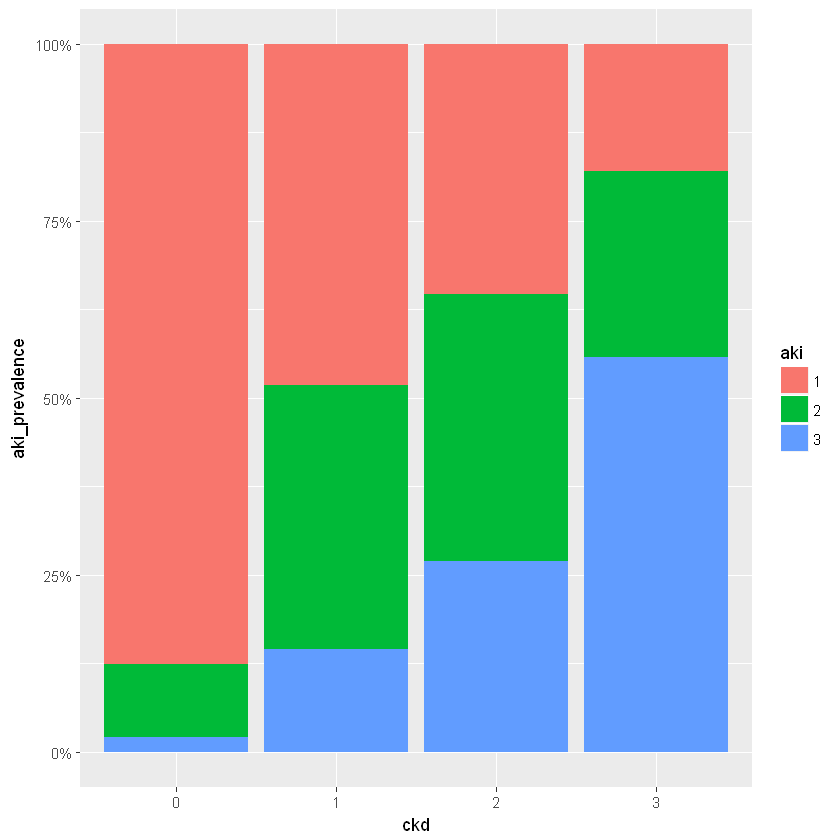

In [41]:
tmp<-
aki %>%
  filter(as.character(aki)>0) %>%
  group_by(ckd,aki) %>%
  summarise(
      aki_prevalence = n()
  )

ggplot(data=tmp, mapping=aes(x=ckd,y=aki_prevalence,fill=aki))+
geom_bar(stat="identity",position="fill")+
scale_y_continuous(labels = scales::percent)

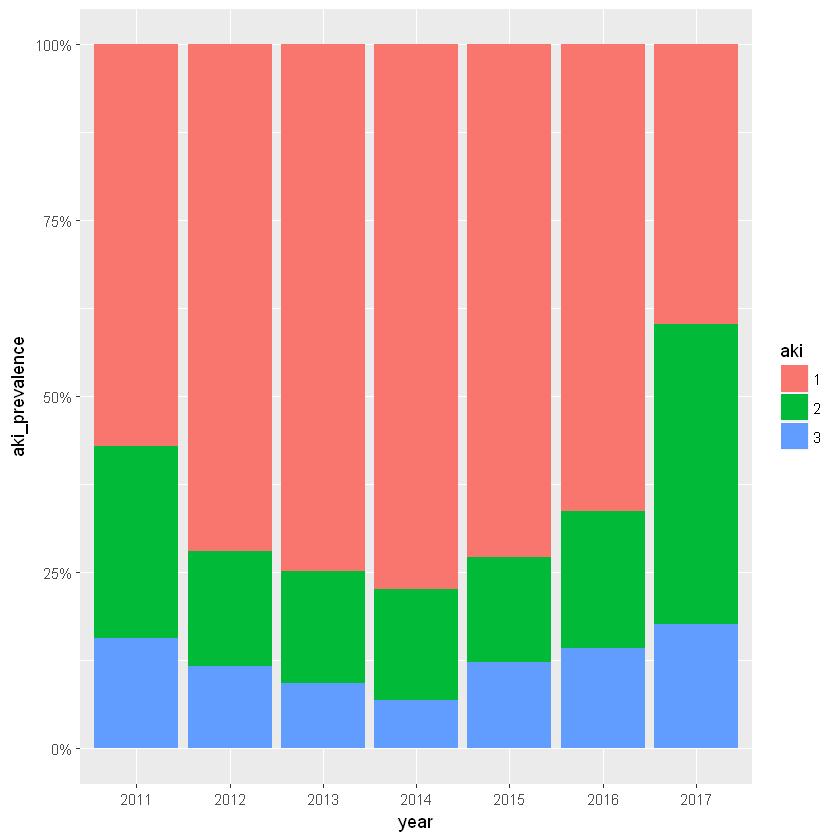

In [42]:
tmp<-
aki %>%
  filter(as.character(aki)>0) %>%
  group_by(aki,year=format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y")) %>%
  summarise(
      aki_prevalence = n()
  )

ggplot(data=tmp, mapping=aes(x=year,y=aki_prevalence,fill=aki))+
geom_bar(stat="identity",position="fill")+
scale_y_continuous(labels = scales::percent)

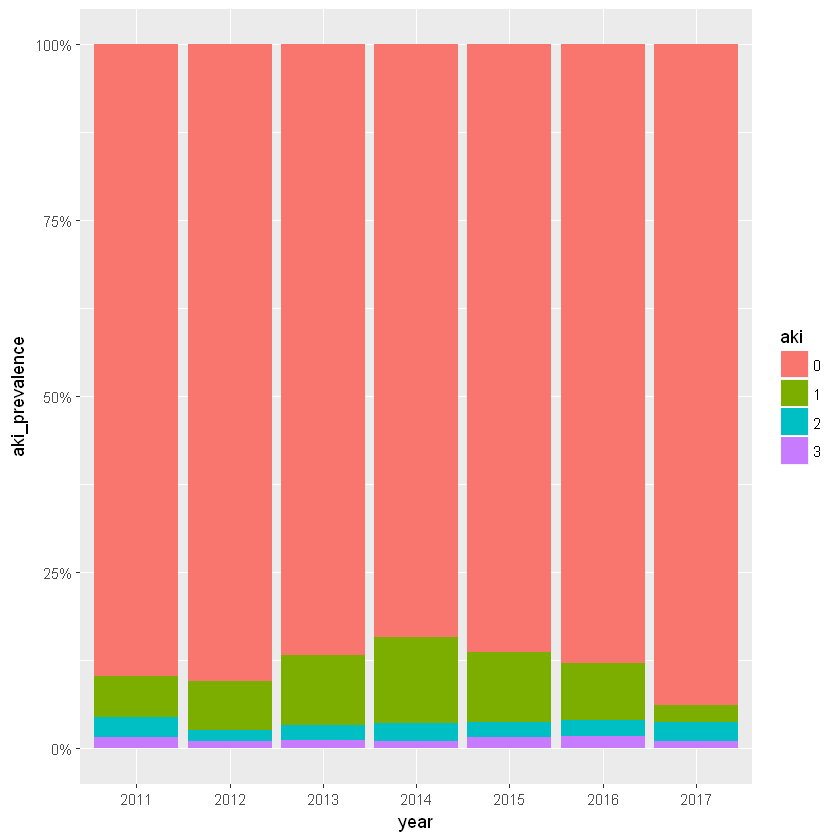

In [43]:
tmp<-
aki %>%
  group_by(aki,year=format(as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"), "%Y")) %>%
  summarise(
      aki_prevalence = n()
  )

ggplot(data=tmp, mapping=aes(x=year,y=aki_prevalence,fill=aki))+
geom_bar(stat="identity",position="fill")+
scale_y_continuous(labels = scales::percent)

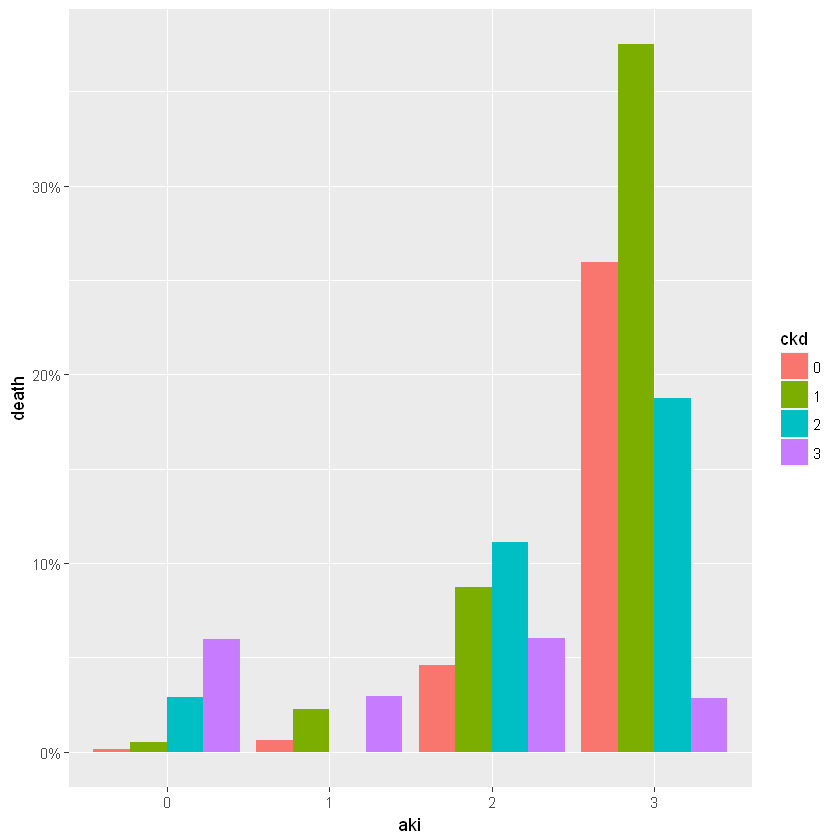

In [44]:
tmp<-
aki %>%
  filter(!is.na(death)) %>%
  group_by(aki,ckd) %>%
  summarise(
      death = sum(as.numeric(as.character(death)))/n()
  )

ggplot(data=tmp, mapping=aes(x=aki,y=death,fill=ckd))+
geom_bar(stat="identity",position="dodge")+
scale_y_continuous(labels = scales::percent)

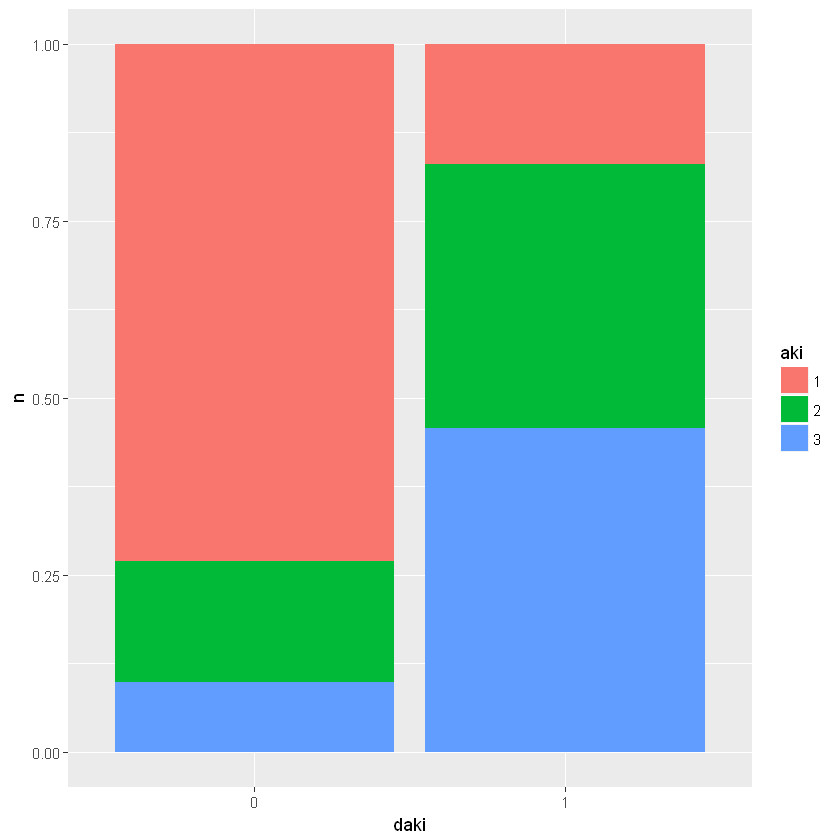

In [45]:
tmp<-
aki %>%
  filter(as.character(aki)>0) %>%
  group_by(aki,daki) %>%
  summarise(
      n=n()
  )

ggplot(data=tmp, mapping=aes(x=daki,y=n,fill=aki))+
geom_bar(stat="identity",position="fill")

In [46]:
prop.table(table(aki$ckd))


         0          1          2          3 
0.80640213 0.14004668 0.02634211 0.02720907 

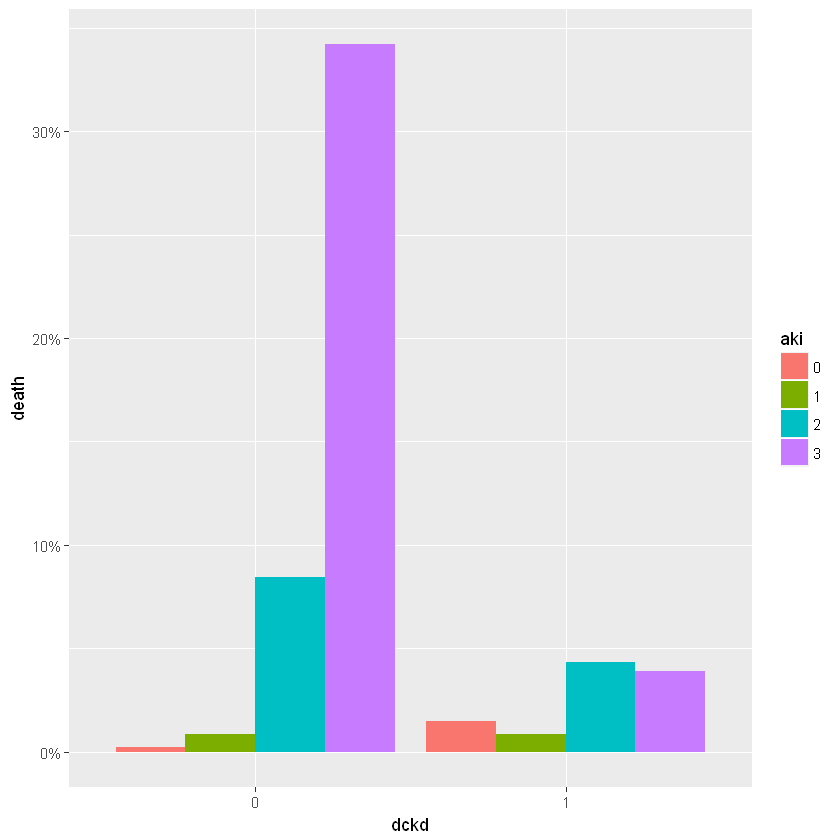

In [47]:
tmp<-
aki %>%
  #filter(as.character(aki)>0) %>%
  group_by(dckd,aki) %>%
  summarise(
      death = sum(as.numeric(as.character(death)))/n()
  )

ggplot(data=tmp, mapping=aes(x=dckd,y=death,fill=aki))+
geom_bar(stat="identity",position="dodge")+
scale_y_continuous(labels = scales::percent)

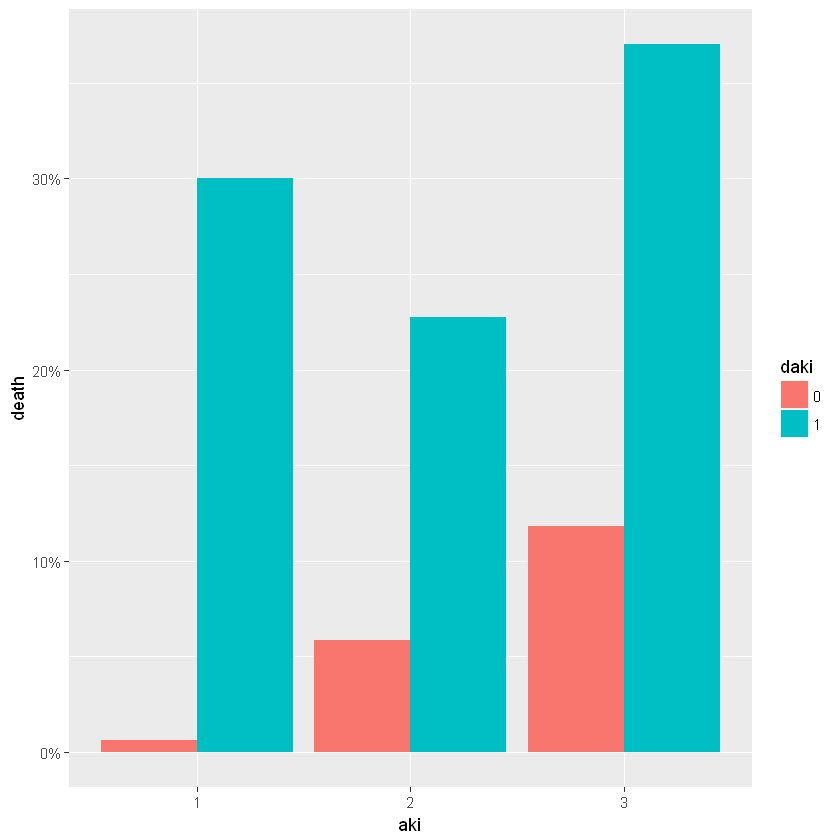

In [48]:
tmp<-
aki %>%
  filter(as.character(aki)>0 & !is.na(death)) %>%
  group_by(aki,daki) %>%
  summarise(
      death = sum(as.numeric(as.character(death)))/n()
  )

ggplot(data=tmp, mapping=aes(x=aki,y=death,fill=daki))+
geom_bar(stat="identity",position="dodge")+
scale_y_continuous(labels = scales::percent)

In [49]:
empi <- read_csv("D:/p/ehr/in_empi.csv")

Parsed with column specification:
cols(
  `<U+FEFF>"MR_ID"` = col_character(),
  PATIENT_NAME = col_character(),
  PATIENT_SEX = col_character(),
  PATIENT_BIRTHDAY = col_integer(),
  MC_CODE = col_character(),
  EMPI_NUM = col_character()
)


In [50]:
names(empi) <- c('MR_ID','PATIENT_NAME','PATIENT_SEX','PATIENT_BIRTHDAY','MC_CODE','EMPI_NUM')

In [51]:
#glimpse(empi)

In [52]:
empi_new<-
aki %>%
  left_join(select(empi,1,5,6), by="MR_ID") %>%
  group_by(MR_ID,EMPI_NUM) %>%
  summarise(
      a = mean(as.numeric(as.character(aki))),
      b = sum(as.numeric(as.character(daki))),
      c = sum(as.numeric(as.character(dckd)))
  ) %>%
  mutate(aki=ifelse(a==0,0,ifelse(a>0&a<2,1,ifelse(a>=2&a<3,2,3)))) %>%
  mutate(daki=ifelse(b==0, 0, 1)) %>%
  mutate(dckd=ifelse(c==0, 0, 1)) %>%
  select(1,2,6,7,8)

In [53]:
#glimpse(empi_new)

In [54]:
#all the lis
lis_sample_all <- read_csv("D:/p/aha/lis_sample_empi.csv")

Parsed with column specification:
cols(
  INSPECTION_ID = col_character(),
  OUTPATIENT_ID = col_character(),
  INPATIENT_ID = col_character(),
  PATIENT_SEX = col_integer(),
  AGE_INPUT = col_character(),
  PATIENT_DEPT = col_character(),
  SAMPLE_CLASS_NAME = col_character(),
  TEST_ORDER_NAME = col_character(),
  SAMPLING_TIME = col_character(),
  CHECK_TIME = col_character(),
  INSERT_TIME = col_character(),
  PATIENT_ID = col_character()
)


In [55]:
lis_sample_all <- select(lis_sample_all, 1,4,5,12)

In [56]:
lis_result_all <- read_csv("D:/p/aha/lis_result_empi.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  INSPECTION_ID = col_character(),
  ENGLISH_NAME = col_character(),
  QUANTITATIVE_RESULT = col_character(),
  QUALITATIVE_RESULT = col_character()
)


In [57]:
lis_scr_all <- filter(lis_result_all, ENGLISH_NAME=="CREA*")

In [58]:
lis_scr_all <- left_join(select(lis_scr_all,2,4), lis_sample_all, by="INSPECTION_ID")

In [59]:
lis_scr_all$QUANTITATIVE_RESULT <- as.numeric(as.character(lis_scr_all$QUANTITATIVE_RESULT))

Warning message in eval(expr, envir, enclos):
"强制改变过程中产生了NA"

In [60]:
cols <- c("AGE_INPUT")
lis_scr_all[cols] <- lapply(lis_scr_all[cols], function(x) iconv(x,"gb2312","UTF-8"))
# replace age into number
lis_scr_all$AGE_INPUT <- as.numeric(str_replace(lis_scr_all$AGE_INPUT, '\\D', ''))

Warning message in eval(expr, envir, enclos):
"强制改变过程中产生了NA"

In [61]:
#glimpse(lis_scr_all)

In [62]:
ckd_prog<-
lis_scr_all %>%
  filter(!is.na(PATIENT_ID)) %>%
  group_by(PATIENT_ID) %>%
  summarise(
      n=n(),
      baseline=QUANTITATIVE_RESULT[INSPECTION_ID==min(INSPECTION_ID)], 
      peak=max(QUANTITATIVE_RESULT),
      last=QUANTITATIVE_RESULT[INSPECTION_ID==max(INSPECTION_ID)],
      followup=as.numeric(as.Date(substr(max(INSPECTION_ID),0,8),"%Y%m%d")-as.Date(substr(min(INSPECTION_ID),0,8),"%Y%m%d")),
      PATIENT_SEX=mean(PATIENT_SEX),
      AGE_INPUT=mean(AGE_INPUT)
  )%>%
  filter(n>1 & followup>90)%>%
  mutate(egfr_last=ifelse(PATIENT_SEX==1,175*(last*0.01131)**(-1.234)*AGE_INPUT**(-0.179),175*(last*0.01131)**(-1.234)*AGE_INPUT**(-0.179)*0.79)) %>%
  mutate(ckd_last=ifelse(egfr_last>=60, 0, ifelse(egfr_last<60&egfr_last>=30, 1, ifelse(egfr_last<30&egfr_last>=15, 2, 3)))) %>%#0=no CKD, 1=CKD stage3, 2=stage4, 3=stage5 
  mutate(egfr_base=ifelse(PATIENT_SEX==1,175*(baseline*0.01131)**(-1.234)*AGE_INPUT**(-0.179),175*(baseline*0.01131)**(-1.234)*AGE_INPUT**(-0.179)*0.79)) %>%
  mutate(ckd_base=ifelse(egfr_base>=60, 0, ifelse(egfr_base<60&egfr_base>=30, 1, ifelse(egfr_base<30&egfr_base>=15, 2, 3)))) %>%#0=no CKD, 1=CKD stage3, 2=stage4, 3=stage5
  select(1,10,12) %>%
  mutate(ckd_prog=ifelse(ckd_last-ckd_base>0,1,0))

In [63]:
dim(ckd_prog)

[1] 6828    4

In [64]:
ckd_prog <- inner_join(ckd_prog, empi_new, by=c("PATIENT_ID"="EMPI_NUM"))

In [65]:
cols <- c("ckd_last","ckd_base", "ckd_prog","aki","daki","dckd")
ckd_prog[cols] <- lapply(ckd_prog[cols], as.factor)

In [66]:
glimpse(ckd_prog)

Observations: 5,220
Variables: 8
$ PATIENT_ID <chr> "0001141E0060C5FFF8669300155F78C2", "000B276045F0EC49E43...
$ ckd_last   <fctr> 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0...
$ ckd_base   <fctr> 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1...
$ ckd_prog   <fctr> 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ MR_ID      <chr> "02320521", "02301080", "02286896", "02130965", "0928399...
$ aki        <fctr> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ daki       <fctr> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ dckd       <fctr> 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0...


In [67]:
table(ckd_prog$ckd_prog)


   0    1 
4647  567 

In [68]:
#tmp<-
ckd_prog %>%
  filter(!is.na(ckd_prog)) %>%
  group_by(aki,daki) %>%
  summarise(
      prog = sum(as.numeric(as.character(ckd_prog))),
      n=n(),
      f=prog/n*100
  )

aki,daki,prog,n,f
0,0,426,4364,9.761687
0,1,1,10,10.000000
1,0,91,680,13.382353
1,1,11,20,55.000000
2,0,28,86,32.558140
2,1,0,4,0.000000
3,0,8,45,17.777778
3,1,2,5,40.000000


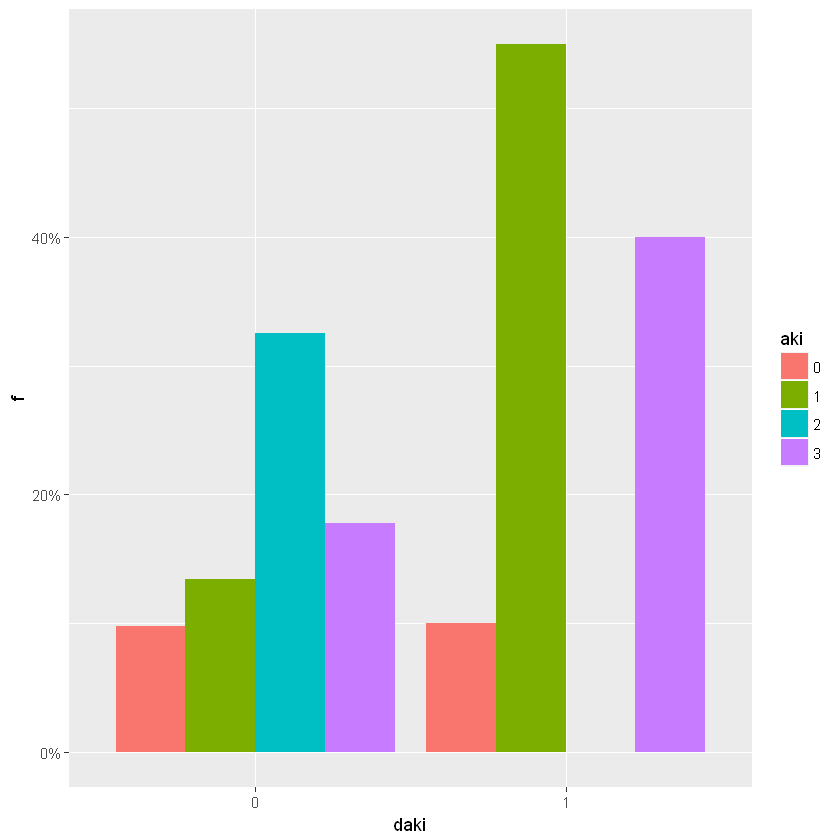

In [69]:
tmp<-
ckd_prog %>%
  filter(!is.na(ckd_prog)) %>%
  group_by(daki,aki) %>%
  summarise(
      prog = sum(as.numeric(as.character(ckd_prog))),
      n=n(),
      f=prog/n
  )

ggplot(data=tmp, mapping=aes(x=daki,y=f,fill=aki))+
geom_bar(stat="identity",position="dodge")+
scale_y_continuous(labels = scales::percent)

In [70]:
aki %>%
  group_by(aki,daki) %>%
  summarise(
      n=n(),
      d=sum(as.numeric(as.character(death))),
      f=d/n()*100
  )

aki,daki,n,d,f
0,0,13101,39,0.2976872
0,1,39,4,10.2564103
1,0,1311,8,0.6102212
1,1,10,3,30.0000000
2,0,307,18,5.8631922
2,1,22,5,22.7272727
3,0,178,21,11.7977528
3,1,27,10,37.0370370


In [71]:
#x<-
aki %>%
  filter(as.character(aki)==1)%>%
  group_by(daki) %>%
  summarise(
      d=sum(as.numeric(as.character(death)))
  )

daki,d
0,8
1,3


In [72]:
#glimpse(aki)

In [73]:
xperim <- read_excel("D:/p/ehr/xperim.xls")

fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904
fread: wanted 1 got 0 loc=12219904


Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [2548, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [2549, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5433, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5434, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5954, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [5955, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names, col_types = col_types, :
"Expecting numeric in [7436, 63] got `False`"Warning message in xls_cols(path, sheet, col_names = col_names

In [74]:
#glimpse(xperim)

In [75]:
#glimpse(df)

In [76]:
cag <- inner_join(select(df,1,2,3,4),select(xperim,6,8),by=c("MR_ID" = "Patient_ID"))

In [77]:
#glimpse(cag)

In [78]:
cag<-
cag %>%
  filter((as.Date(Procedure_Date,"%Y%m%d 00:00:00")>=as.Date(as.character(format(IN_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S"))&(as.Date(Procedure_Date,"%Y%m%d 00:00:00")<=as.Date(as.character(format(OUT_HOS_DATETIME,scientific=FALSE)),"%Y%m%d%H%M%S")))

Warning message in as.POSIXlt.POSIXct(x, tz = tz):
"unknown timezone '%Y%m%d 00:00:00'"Warning message in as.POSIXlt.POSIXct(x, tz = tz):
"unknown timezone '%Y%m%d 00:00:00'"

In [79]:
cag<-distinct(select(cag,IN_PATIENT_FLOW))

In [80]:
cagaki <- inner_join(aki,cag,by=c("INPATIENT_ID" = "IN_PATIENT_FLOW"))

In [81]:
#glimpse(cagaki)

In [82]:
cagaki %>%
  group_by(aki, daki) %>%
  summarise(
      n=n(),
      d=sum(ifelse(death==1,1,0)),
      f=d/n*100
  )

aki,daki,n,d,f
0,0,3026,4,0.1321877
0,1,3,0,0.0000000
1,0,268,0,0.0000000
2,0,53,3,5.6603774
2,1,4,0,0.0000000
3,0,41,2,4.8780488
3,1,6,2,33.3333333


In [83]:
table(cagaki$daki)


   0    1 
3388   13 